In [2]:
import pandas as pd
import glob
import os



In [3]:
df = pd.read_csv("/Users/varunsatheesh/Downloads/full_dataset_with_int_map.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,wlan_code_index,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput
0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,0,10.0,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77
1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,-108.60,...,1,30.0,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11
2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,-119.82,...,2,50.0,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72
3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,-133.97,...,3,70.0,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05
4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,-82.35,...,4,10.0,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,-88.83,...,5,30.0,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16
7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,-105.59,...,6,50.0,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58
7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,-122.95,...,7,70.0,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17
7398,7398,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,10000.00,...,8,10.0,50.0,4,4,5,-50.328000,21.276000,57.23500,20.81


In [26]:
X = df[['wlan_code_index','x(m)','y(m)','primary_channel','min_channel_allowed','max_channel_allowed','RSSI','SINR','average_airtime','0','1','2','3','4','5','6','7','8','9','10','11']].values
y = df['throughput'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [29]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 26.60265351731218
RMSE value for k=  2 is: 24.37814941982133
RMSE value for k=  3 is: 22.786093303900387
RMSE value for k=  4 is: 22.684874384812662
RMSE value for k=  5 is: 22.779552977983496
RMSE value for k=  6 is: 22.985161810044623
RMSE value for k=  7 is: 22.83109026615489
RMSE value for k=  8 is: 22.802298654037912
RMSE value for k=  9 is: 23.057150476358146
RMSE value for k=  10 is: 23.284184879116232
RMSE value for k=  11 is: 23.33406693061559
RMSE value for k=  12 is: 23.461712780106254
RMSE value for k=  13 is: 23.512135631898968
RMSE value for k=  14 is: 23.550943900313165
RMSE value for k=  15 is: 23.67789971375279
RMSE value for k=  16 is: 23.842315521990916
RMSE value for k=  17 is: 23.889871810878038
RMSE value for k=  18 is: 23.923379261658052
RMSE value for k=  19 is: 24.0991468221199
RMSE value for k=  20 is: 24.19222285978911


<AxesSubplot:>

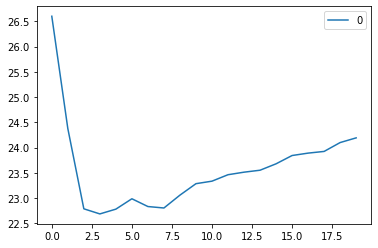

In [31]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [32]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set

In [33]:
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
error

22.786093303900387

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8248667994719885